# Decision Tree and Random Forest Kyphosis

In this notebook we will apply Decision Tree algorithm to the Kyphosis dataset.
We will first apply a single Decision Tree and we will visualize it using pydot library. Then we will use Random Forst to see if it can improve the results

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## Data Visualization

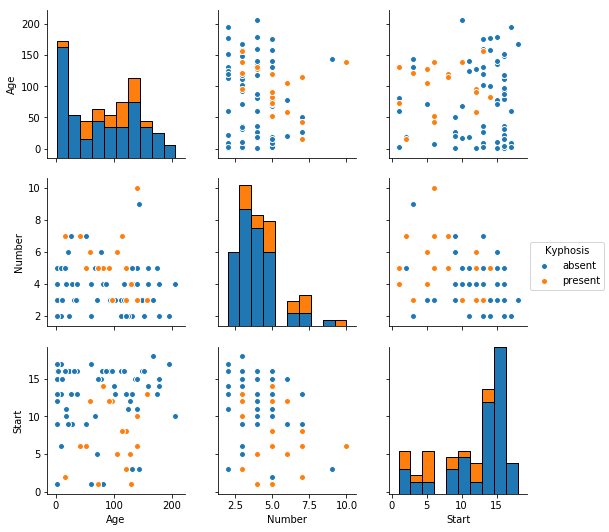

In [7]:
plt.rcParams["patch.force_edgecolor"] = True
sns.pairplot(df, hue = 'Kyphosis')

## Train and Test Split

In [35]:
X = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree
Let's start by training a single decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# Create an instance of a decision tree
dtree = DecisionTreeClassifier()

In [38]:
# Fit the decision tree to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
predictions = dtree.predict(X_test)

In [40]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, predictions))

Confusion Matrix : 
[[13  4]
 [ 3  5]]


In [52]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     absent       0.81      0.76      0.79        17
    present       0.56      0.62      0.59         8

avg / total       0.73      0.72      0.72        25



## Tree Visualization

We will use Scikit learn built-in visualization capabilities for decision trees

In [59]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os

os.environ["PATH"] += os.pathsep + 'C:/Users/Marco/Downloads/graphviz-2.38/release/bin'

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

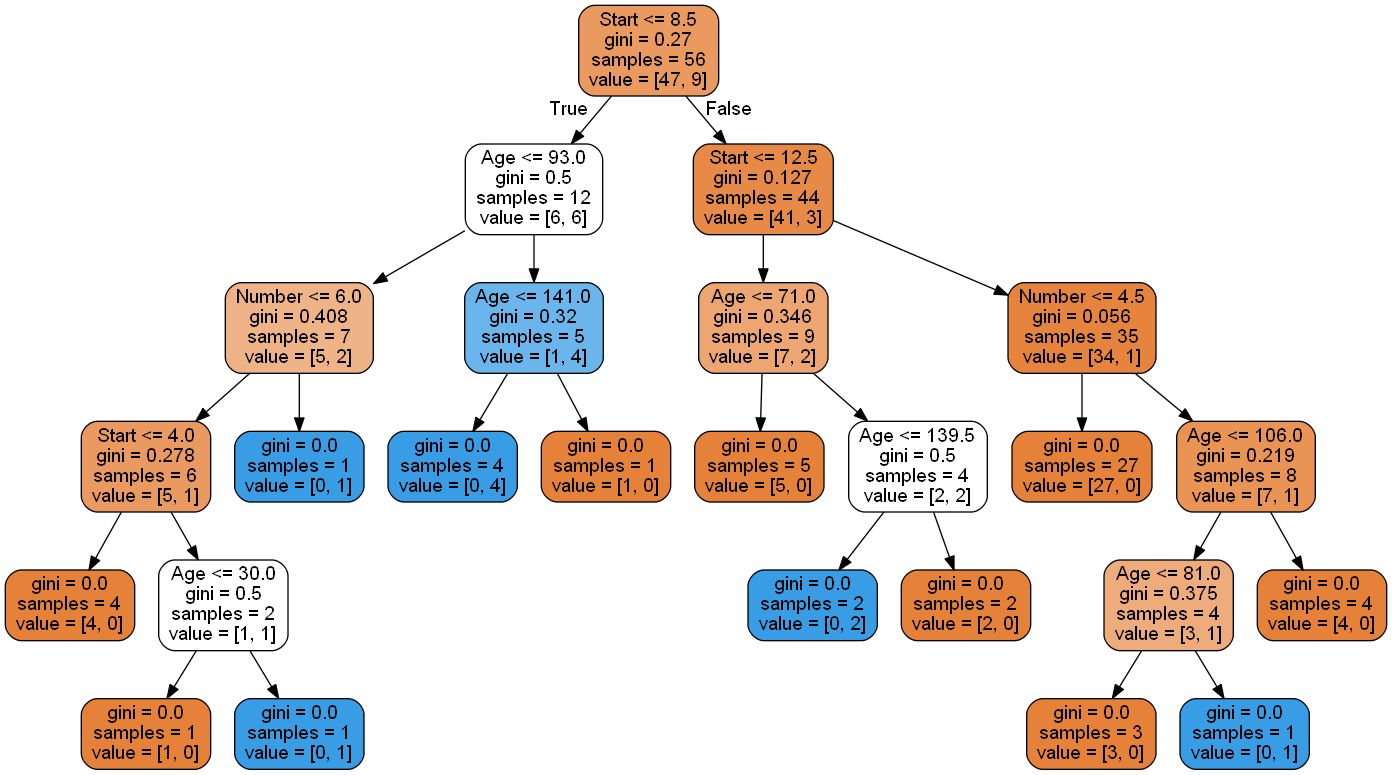

In [60]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Create an instance of the algorithm
rfc = RandomForestClassifier(n_estimators = 200)

In [46]:
# Fit model on training set
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
# predictions
rfc_pred = rfc.predict(X_test)

In [50]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, rfc_pred))

Confusion Matrix : 
[[16  1]
 [ 4  4]]


In [61]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

     absent       0.80      0.94      0.86        17
    present       0.80      0.50      0.62         8

avg / total       0.80      0.80      0.79        25



From this classification report it is possible to notice that the precision, recall and F-1 score increase using Random Forest compared to the single Decision Tree